In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
dataset = pd.read_csv("diabetes.csv")

In [3]:

from sklearn.preprocessing import StandardScaler
std = StandardScaler()


In [4]:

X = dataset.drop("Outcome", axis=1)
y = dataset["Outcome"]

In [5]:
X = std.fit_transform(X)

In [6]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [7]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model)

GaussianNB()


In [8]:
# make predictions
predicted = model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix
metrics.confusion_matrix(predicted, y_test)

array([[116,  29],
       [ 31,  55]], dtype=int64)

In [10]:
model_score = model.score(X_test, y_test)
model_score

0.7402597402597403

In [11]:
y_predictProb = model.predict_proba(X_test)

In [12]:
from sklearn.metrics import auc, roc_curve

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])

In [14]:
roc_auc = auc(fpr, tpr)
roc_auc

0.7973760932944606

In [15]:
import matplotlib.pyplot as plt

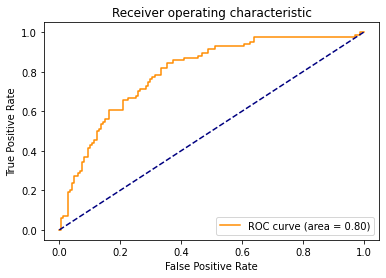

In [16]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [17]:
plt.savefig('ROC_CURVE.png')

<Figure size 432x288 with 0 Axes>